## <b>Credit Card Fraud Detection</b>

### About Dataset
<br>
Context
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

### Content
<br>
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.

### <b> Importing the Dependencies </b>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, f1_score, precision_recall_curve, auc


import warnings

# Filter all warnings
warnings.filterwarnings("ignore")

# Filter specific warning category
warnings.filterwarnings("ignore", category=DeprecationWarning)


### <b> Data Loading </b>

In [2]:
cc = pd.read_csv('creditcard.csv')

In [3]:
#displaying the first 5 rows
cc.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
#displaying the column names
cc.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

### <b> Exploratory Data Analysis </b>

In [5]:
#checking for null values
null_cols =[col for col in cc if cc[col].isnull().sum()>0]
print('Null values exist in columns:', null_cols) if null_cols else print('No Null values in any columns')

No Null values in any columns


In [6]:
#general information
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#statistical information
cc.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,1.168375e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,3.416908e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-1.379537e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.074095e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,9.604066e-16,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,1.487313e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-5.556467e-16,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,1.213481e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-2.406331e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [11]:
#Function for countplot

def count_plot(data, feature):
    plt.figure(figsize=(10,8))
    '''
    Function to display a countplot of the target column( Class)
    data (Dataframe) --> The Dataframe containing the whole dataset
    feature (str): The column to be visualized.
    '''
    
    #countplot function
    sns.countplot(data=data, x=feature)

    #adding the title
    plt.title(f'Count-Plot of {feature}')
    #displaying the plot
    plt.show()
    
#Function for distplot

def dist_plot(data, feature):
    plt.figure(figsize=(10,8))
    '''
    Function to display a dist-tplot of the target column(Amount)
    data (Dataframe) --> The Dataframe containing the whole dataset
    feature (str): The column to be visualized.
    '''
    
    #distplot function
    sns.distplot(x=data[feature], kde=True)

     #adding the title
    plt.title(f'Dist-Plot of {feature}')
    
    #displaying the distplot
    plt.show()
    

def scatter_plot(data, column1, column2):
    plt.figure(figsize=(10,8))
    '''
    Function to display a scatter-plot of the target column(Amount)
    data (Dataframe) --> The Dataframe containing the whole dataset
    column 1, column 2 (str): The columns to be visualized.

    '''
    
    #scatterplot function

    sns.scatterplot(data=data, y=column1, x=column2)
    
    #adding the title
    plt.title(f'Scatter-Plot of {column1} against {column2}')
     
    #displaying the scatter-plot
    plt.show()


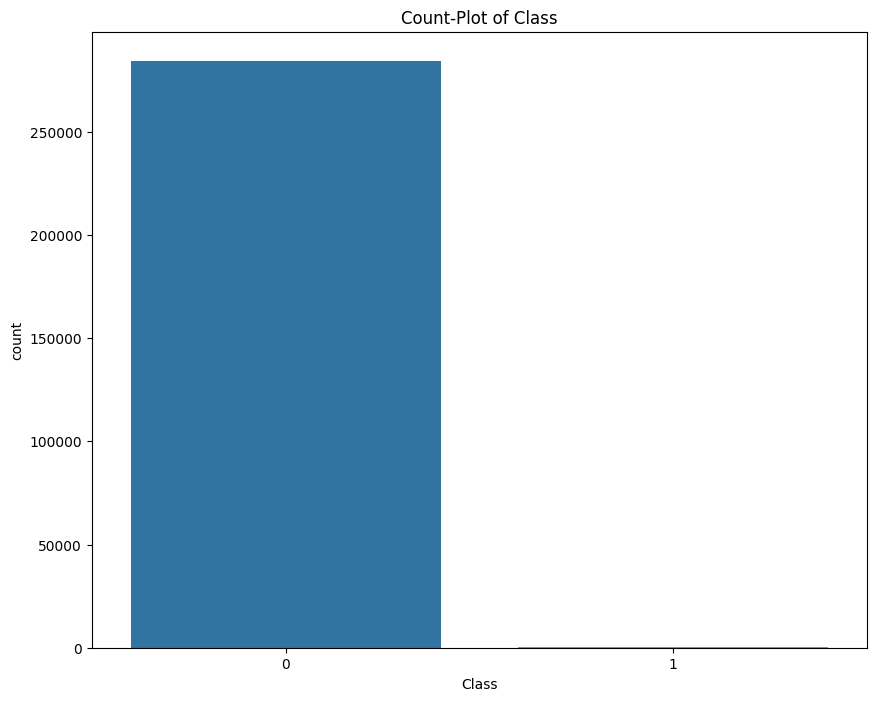

In [15]:
#visualizng the countplot fiunction
count_plot(cc, 'Class')

Observations:
1. The Class column of the dataset is highly unbalanced
  <ul>
    <li>The Class with Value 0 indicates that most of the entires entered are falagged off as non-fraud</li>
    <li>The Calss with Value 1 indicates that a few entries where falgged as fraudulent </li>

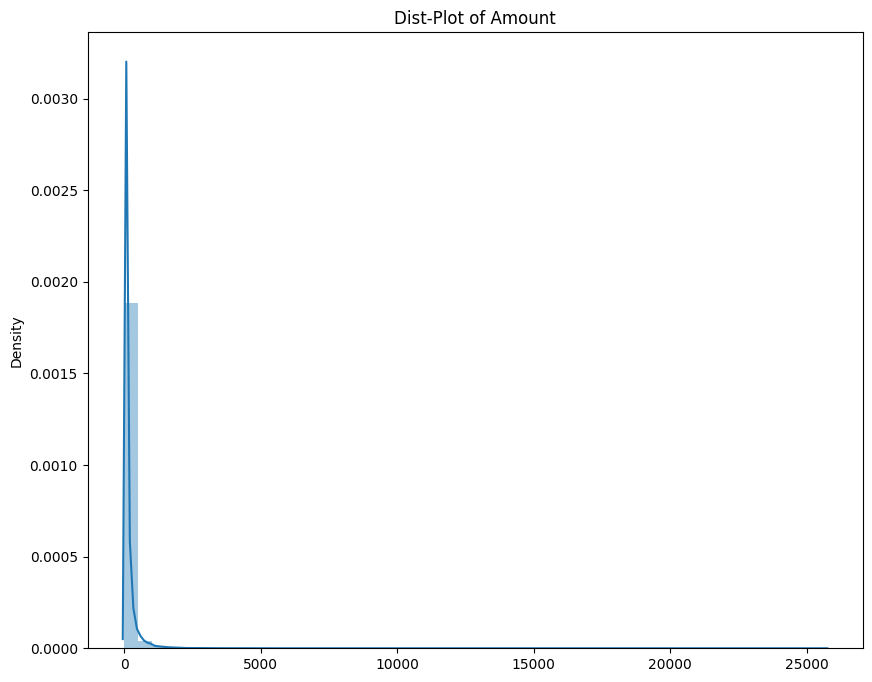

In [18]:
dist_plot(cc, 'Amount')

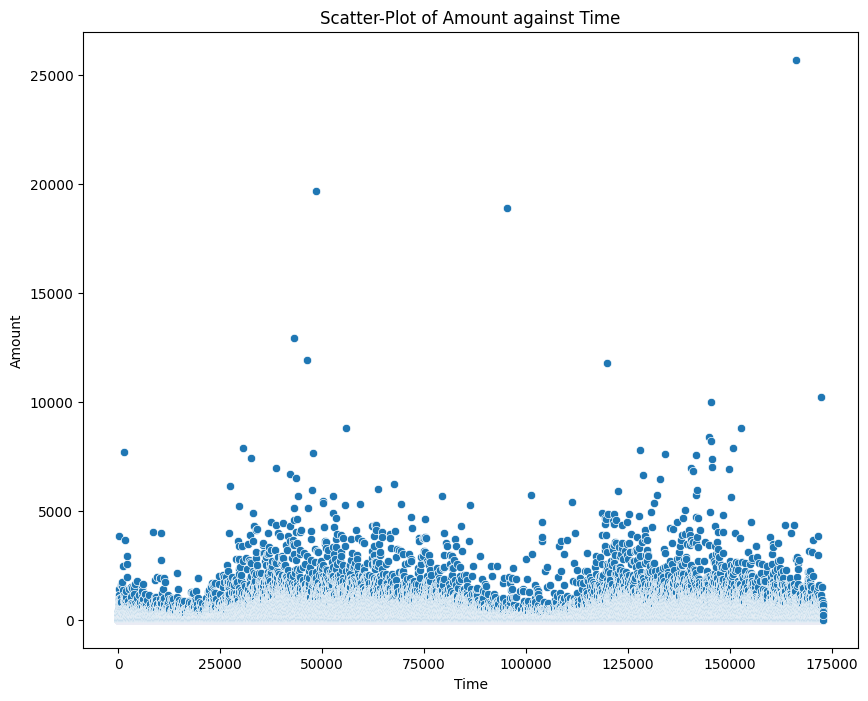

In [16]:
scatter_plot(cc, 'Amount', 'Time')

Observations:
1. The Amount column will be scaled due to the extreme values on the x-axis

In [7]:
def scale_column(data, column_name):
    '''
    Function to scale a specified column in a DataFrame using Min-Max scaling.
    
    Parameters:
    data (DataFrame): The DataFrame containing the data.
    column_name (str): The name of the column to be scaled.
    
    Returns:
    scaled_data (DataFrame): The DataFrame with the specified column scaled.
    '''
    # Initialize the MinMaxScaler
    scaler = MinMaxScaler()
    
    # Scale the specified column
    scaled_column = scaler.fit_transform(data[[column_name]])
    
    # Create a new DataFrame with the scaled column
    scaled_data = data.copy()
    scaled_data[column_name + '_scaled'] = scaled_column
    
    return scaled_data


In [8]:
#scaling the amount column
cc_df = scale_column(cc, 'Amount')

In [9]:
#dropping the Amount column
cc_df.drop('Amount', axis=1, inplace=True)

#renaming the column
cc_df.rename(columns={
    'Amount_scaled': 'Amount'
}, inplace=True)

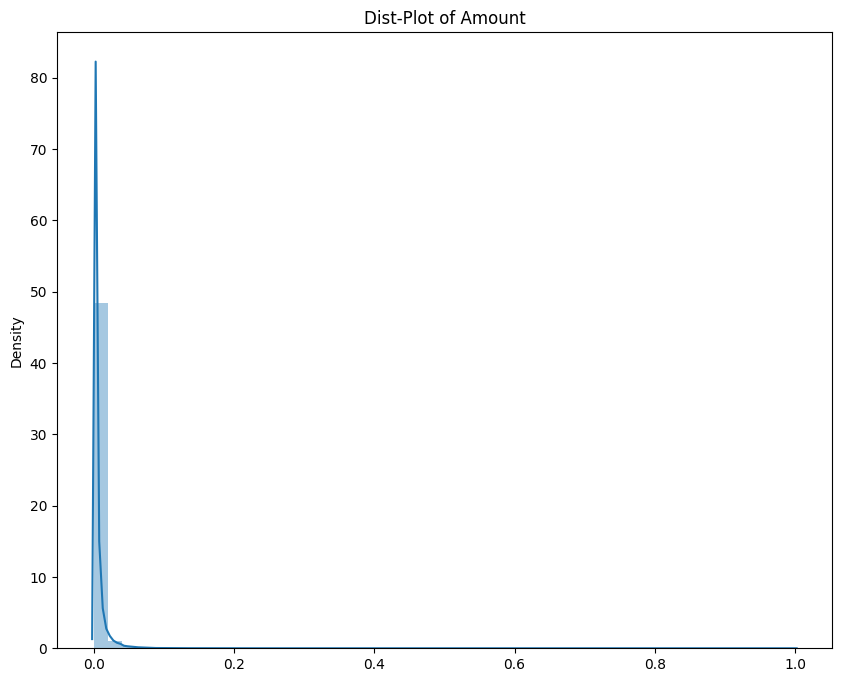

In [23]:
#verifying
dist_plot(cc_df, 'Amount')

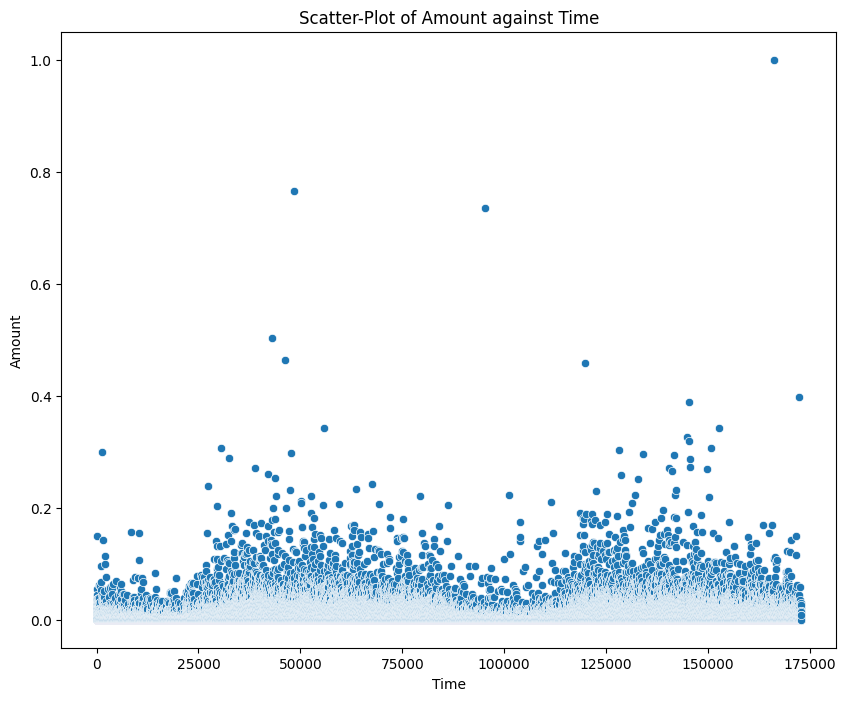

In [12]:
scatter_plot(cc_df, 'Amount', 'Time')

In [24]:
#displyaing the first 5 rows
cc_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.005824
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,0.000105
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,0.014739
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.004807
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.002724


### <b> Correlation and Matrix </b>

In [15]:
#getting the correlation
correlation = cc_df.corr()

#correlation with the target class
correlation['Class']

Time     -0.012323
V1       -0.101347
V2        0.091289
V3       -0.192961
V4        0.133447
V5       -0.094974
V6       -0.043643
V7       -0.187257
V8        0.019875
V9       -0.097733
V10      -0.216883
V11       0.154876
V12      -0.260593
V13      -0.004570
V14      -0.302544
V15      -0.004223
V16      -0.196539
V17      -0.326481
V18      -0.111485
V19       0.034783
V20       0.020090
V21       0.040413
V22       0.000805
V23      -0.002685
V24      -0.007221
V25       0.003308
V26       0.004455
V27       0.017580
V28       0.009536
Class     1.000000
Amount    0.005632
Name: Class, dtype: float64

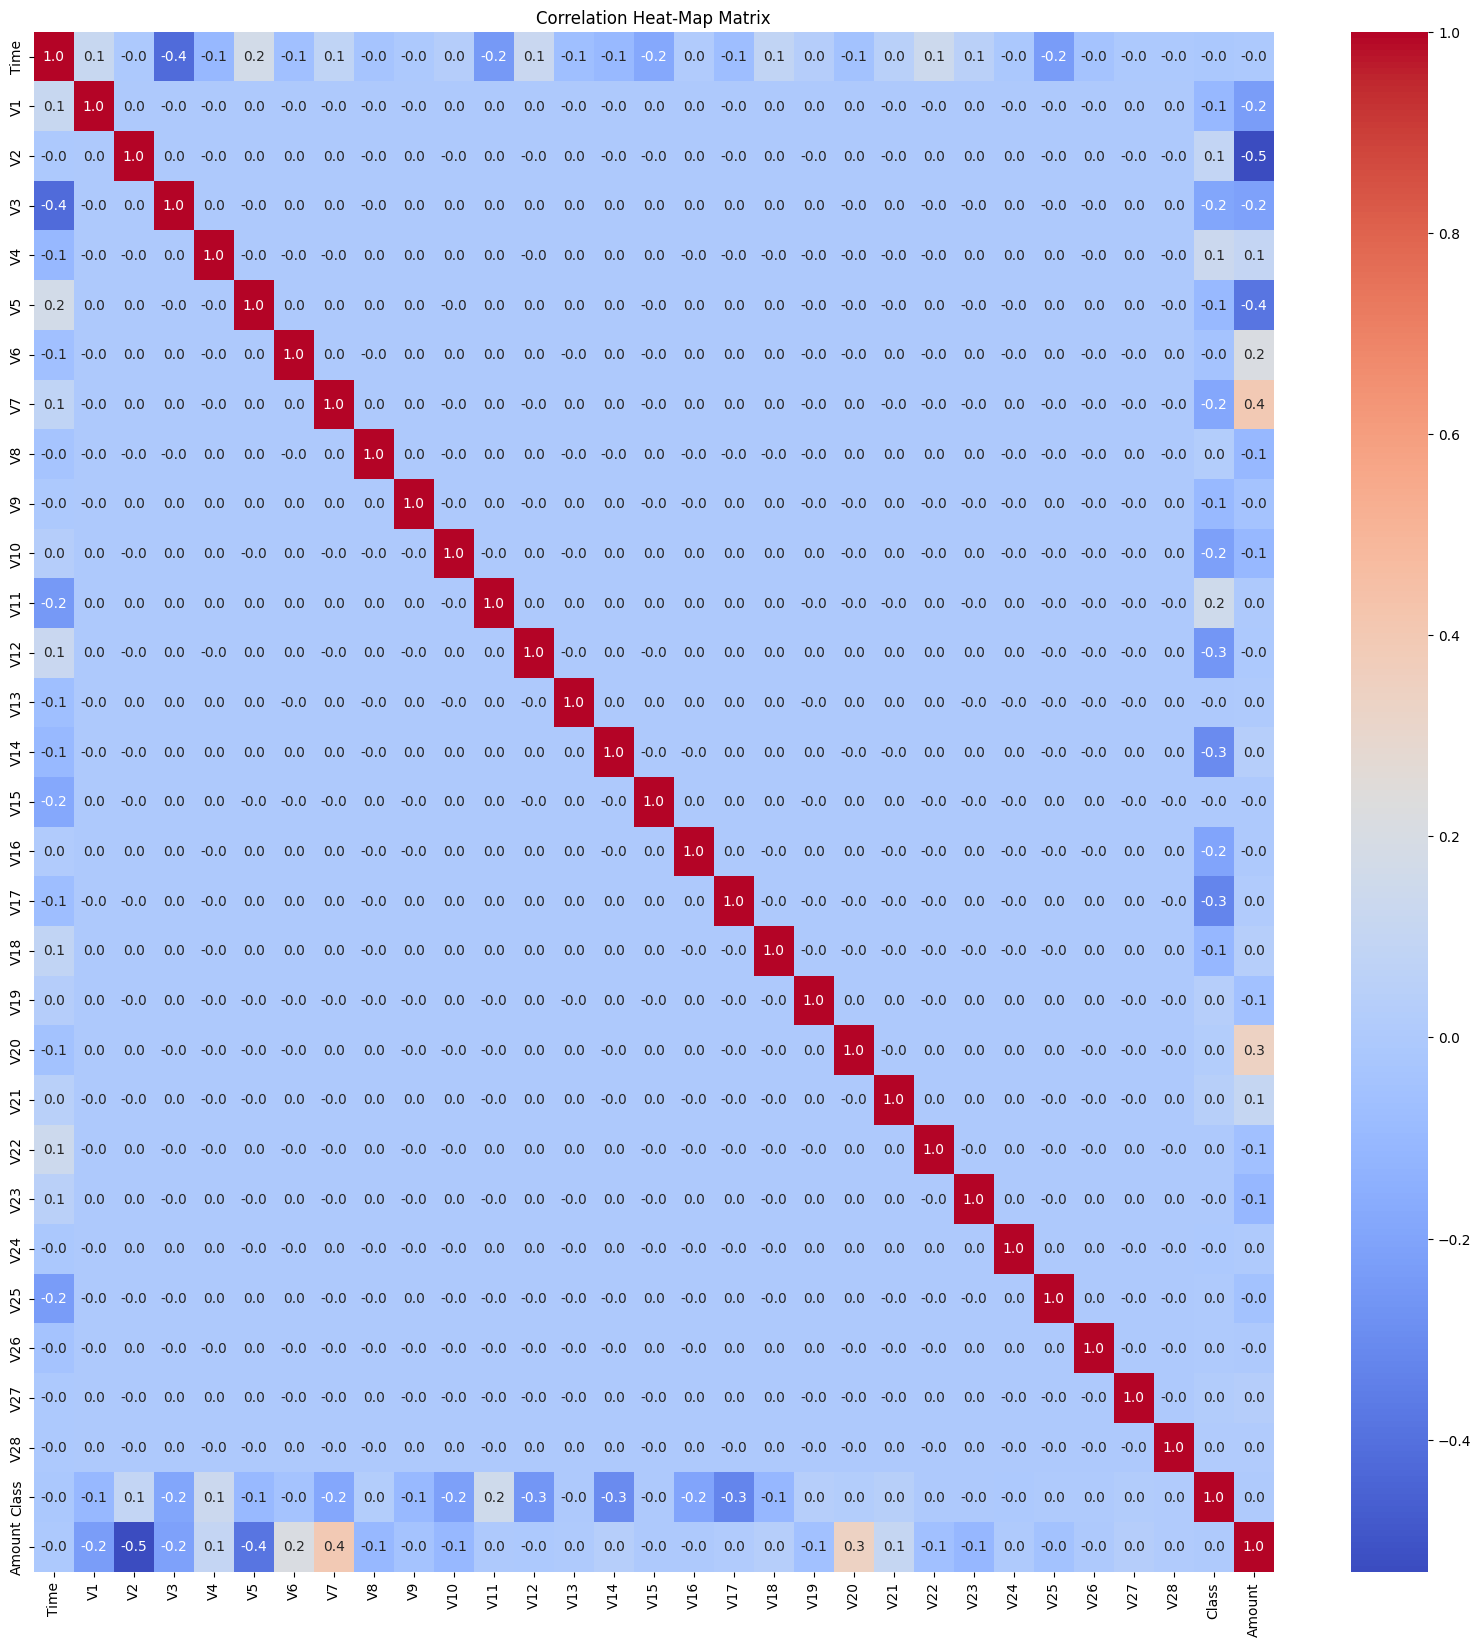

In [16]:
#setting the figure size
plt.figure(figsize=(20,20))

#the heatmap
sns.heatmap(
    correlation,
    annot=True,
    fmt='.1f',
    cbar=True,
    cmap='coolwarm'
)
plt.title('Correlation Heat-Map Matrix')
plt.show()


In [16]:
#selecting the class with non-fraud
non_fraud= cc_df[cc_df['Class']== 0]
non_fraud['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284315, dtype: int64

In [17]:
#selecting the class with fraud
fraud = cc_df[cc_df['Class']== 1]
fraud['Class']

541       1
623       1
4920      1
6108      1
6329      1
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 492, dtype: int64

In [18]:
#selecting a random sample of 500 from the non_fraund dataframe
random_non_fraud = non_fraud.sample(492, random_state=42)
random_non_fraud

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
138028,82450.0,1.314539,0.590643,-0.666593,0.716564,0.301978,-1.125467,0.388881,-0.288390,-0.132137,...,-0.170307,-0.429655,-0.141341,-0.200195,0.639491,0.399476,-0.034321,0.031692,0,0.000030
63099,50554.0,-0.798672,1.185093,0.904547,0.694584,0.219041,-0.319295,0.495236,0.139269,-0.760214,...,0.202287,0.578699,-0.092245,0.013723,-0.246466,-0.380057,-0.396030,-0.112901,0,0.000163
73411,55125.0,-0.391128,-0.245540,1.122074,-1.308725,-0.639891,0.008678,-0.701304,-0.027315,-2.628854,...,-0.133485,0.117403,-0.191748,-0.488642,-0.309774,0.008100,0.163716,0.239582,0,0.000584
164247,116572.0,-0.060302,1.065093,-0.987421,-0.029567,0.176376,-1.348539,0.775644,0.134843,-0.149734,...,0.355576,0.907570,-0.018454,-0.126269,-0.339923,-0.150285,-0.023634,0.042330,0,0.002219
148999,90434.0,1.848433,0.373364,0.269272,3.866438,0.088062,0.970447,-0.721945,0.235983,0.683491,...,0.103563,0.620954,0.197077,0.692392,-0.206530,-0.021328,-0.019823,-0.042682,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121938,76376.0,-1.525978,0.796226,1.172478,-0.947111,0.077071,-1.655590,0.670737,0.051626,-0.887067,...,0.057467,-0.072446,-0.397195,0.825601,0.404932,0.923867,-0.262266,-0.133368,0,0.000895
84533,60348.0,-0.705795,1.418016,0.993756,0.908646,-0.171163,-0.566892,0.367416,0.421875,-0.736533,...,0.197948,0.655792,-0.048655,0.415045,-0.287710,-0.305466,0.311077,0.161942,0,0.000109
55840,47151.0,0.995185,-0.147746,-0.108914,1.168451,0.329676,1.182090,-0.316034,0.323043,0.541030,...,-0.050798,0.005680,-0.370879,-1.385989,0.746056,-0.191335,0.070408,0.041460,0,0.003850
70411,53857.0,-1.197741,3.166857,-3.476764,0.818768,1.310580,-0.445066,0.384113,0.497864,0.552898,...,-0.293749,-0.264981,0.090417,-1.691177,0.032926,-0.285576,0.752378,0.345595,0,0.000035


### <b>Concatenating the Two dataframes </b>

In [19]:
# Concatenating the two DataFrames together
combine_df =pd.concat(
    [random_non_fraud, fraud]
)

#final dataframe randomized 
final_df = shuffle(combine_df, random_state=42).reset_index(drop=True)

In [30]:
#displaying the first 5 rows
final_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Amount
0,41233.0,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,...,2.571970,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,1,0.000000
1,1308.0,-1.379848,0.536720,2.647870,1.408111,0.126442,0.986525,0.960251,-0.629717,1.729173,...,-0.666874,-0.343574,0.022138,0.093532,0.011293,-0.503395,-0.438189,-0.346731,0,0.001705
2,72327.0,-4.198735,0.194121,-3.917586,3.920748,-1.875486,-2.118933,-3.614445,1.687884,-2.189871,...,0.801312,-0.183001,-0.440387,0.292539,-0.144967,-0.251744,1.249414,-0.131525,1,0.009299
3,78685.0,-0.671155,1.183971,0.793623,-0.218410,0.357282,-0.023707,0.363563,0.463983,-0.704518,...,-0.083474,-0.352537,-0.092199,-0.764804,-0.292712,0.185362,-0.028254,0.055953,0,0.000051
4,31244.0,1.087002,0.065459,0.485043,1.343874,-0.283361,0.002520,-0.076665,0.165384,0.151865,...,-0.040723,0.016005,-0.048042,0.208209,0.571482,-0.340377,0.028643,0.007649,0,0.000722


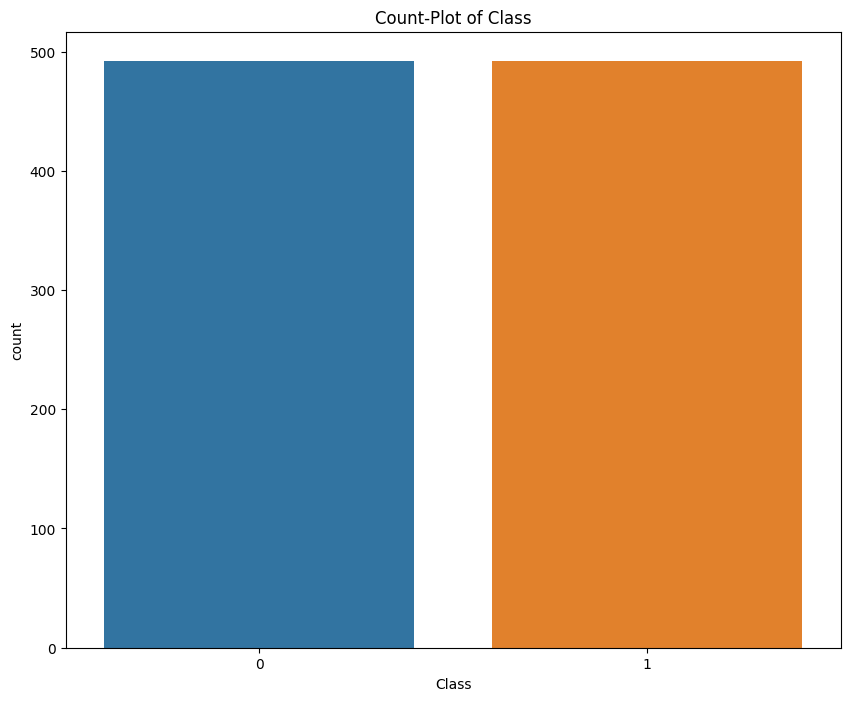

In [31]:
#checking the traget column
count_plot(final_df, 'Class')

Observations:
1. The new dataframe looks well balanced.

### <b> Feature Selection </b>

In [20]:
#independent-variables
X = final_df.drop('Class', axis=1)
#dependent variable
y = final_df['Class']

### <b> Data Splitting </b>

In [21]:
#splitting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [22]:
#displaying the shapes
print('Train Shape\n', X_train.shape, y_train.shape)
print('\nTest Shape\n', X_test.shape, y_test.shape)

Train Shape
 (787, 30) (787,)

Test Shape
 (197, 30) (197,)


### <b> Model Selection/ Training/ Prediction / Accuracy </b>

In [25]:
#models
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC(),
    'KNeighbors(KNN)': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
    
}

In [28]:
#lopping thrrough each items
for name, model in models.items():
    #training the model
    
    model.fit(X_train, y_train)
    
    #making predictions
    y_pred = model.predict(X_test)
    
    #accuracy score
    acc_score = (accuracy_score(y_pred, y_test)) * 100
    
    #f1 score
    f1 = f1_score(y_pred, y_test)
    
    print(f'Model:{name}')
    print(f'Accuracy:{acc_score}')
    print(f'F1 Score: {f1}')
    print('--'*10)

Model:Logistic Regression
Accuracy:91.37055837563452
F1 Score: 0.8957055214723926
--------------------
Model:Decision Tree
Accuracy:91.37055837563452
F1 Score: 0.9005847953216374
--------------------
Model:SVM
Accuracy:57.868020304568525
F1 Score: 0.5911330049261084
--------------------


Model:KNeighbors(KNN)
Accuracy:64.46700507614213
F1 Score: 0.6236559139784946
--------------------
Model:Random Forest
Accuracy:92.89340101522842
F1 Score: 0.9125
--------------------
Model:Gradient Boosting
Accuracy:93.4010152284264
F1 Score: 0.9192546583850931
--------------------


Conclusion:
1. The Random Forest Model Outperforms the remaining classifier algorithms
2. The KNN performed lower compared to the other models in terms of accuracy and F1 score.


### <b> Fine Tuning Each Model </b>

<b>1. Logistic Regression </b>

In [29]:
#parameter grid for logistic regression
logistic_param_grid = {
    'C': [0.001,0.01,0.1,1,10], #regularizarion
    'penalty': ['l1', 'l2'] #penalty
}

In [30]:
#instance of the logisticRegression
logistic_classifier = LogisticRegression()

#grid search
grid_search_logisitc = GridSearchCV(estimator= logistic_classifier, 
                                    param_grid=logistic_param_grid,
                                   cv=5,
                                   scoring='accuracy')

#training the model
grid_search_logisitc.fit(X_train, y_train)

#getting the best params
best_param_logisitc = grid_search_logisitc.best_params_
best_param_logistic_score = grid_search_logisitc.best_score_

#displaying the results
print('Best Parameters Logisitic Regression:',best_param_logisitc)
print('Cross Validation Accuracy:', (best_param_logistic_score) * 100)

Best Parameters Logisitic Regression: {'C': 0.1, 'penalty': 'l2'}
Cross Validation Accuracy: 93.89825042328468


<b> 2. Decision Tree </b>

In [31]:
#parameter grid for Decision Tree
DT_param_grid = {
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion': ['gini', 'entropy'],
    'min_samples_leaf':[5,10,15],
    'min_samples_split': [5,10,15],
    'max_depth':[10,20,30, None]
    
}

In [32]:
#instance of the DecisionTree Classifier
DT_classifier = DecisionTreeClassifier()

#grid search
grid_search_DT = GridSearchCV(
    estimator = DT_classifier,
    param_grid = DT_param_grid,
    cv=5,
    scoring='accuracy'
)

#training the model
grid_search_DT.fit(X_train, y_train)

#getting the best params
best_param_DT = grid_search_DT.best_params_
best_param_DT_score = grid_search_DT.best_score_

#displaying the results
print('Best Parameters Decision Tree:',best_param_DT)
print('Cross Validation Accuracy:', (best_param_DT_score) * 100)


Best Parameters Decision Tree: {'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 10}
Cross Validation Accuracy: 93.51850358784166


<b>3. SVM </b>

In [35]:
# parameter grid for SVM(SVC)
SVC_param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear','rbf'],
}

In [36]:
#instance of the SVC Classifier
svc_classifier = SVC()

# grid search
grid_search_SVC = GridSearchCV(
    estimator=svc_classifier,
    param_grid=SVC_param_grid,
    cv=5,
    scoring='accuracy'
)

# training the model
grid_search_SVC.fit(X_train, y_train)

# getting the best params
best_param_SVC = grid_search_SVC.best_params_
best_param_SVC_score = grid_search_SVC.best_score_

# displaying the results
print('Best Parameters Support Vector Machine:', best_param_SVC)
print('Cross Validation Accuracy:', best_param_SVC_score * 100)


Best Parameters Support Vector Machine: {'C': 1, 'kernel': 'linear'}
Cross Validation Accuracy: 90.7224058695477


<b>4. KNN </b>

In [49]:
knn_param_grid = {
    'n_neighbors': list(range(1,20)),
    'leaf_size': (20,40,1),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),
}

In [52]:
#instance of the SVC Classifier
knn_classifier = KNeighborsClassifier()

# grid search
grid_search_knn = GridSearchCV(
    estimator=knn_classifier,
    param_grid=knn_param_grid,
    cv=5,
    scoring='accuracy',
)

# training the model
grid_search_knn.fit(X_train, y_train)

# getting the best params
best_param_knn = grid_search_knn.best_params_
best_param_knn_score = grid_search_knn.best_score_

# displaying the results
print('Best Parameters KNN:', best_param_knn)
print('Cross Validation Accuracy:', best_param_knn_score * 100)


Best Parameters KNN: {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'distance'}
Cross Validation Accuracy: 64.42796097718293


<b>5. Random Forest </b>

In [54]:
rf_param_grid = {
    'bootstrap': [True, False],
    'max_depth': [10,15],
    'max_features': [2,5,10],
    'min_samples_leaf':[3,4,5,6],
    'min_samples_split': [3,4,5,6],
    'n_estimators':[10,20,30,40,50]
}

In [55]:
#instance of the Random Forest Classifierl
rf = RandomForestClassifier()

#grid search
grid_search_rf = GridSearchCV(
    estimator = rf, 
    param_grid = rf_param_grid, 
    cv = 5,
    scoring='accuracy')

# Fit the grid search to the data
grid_search_rf.fit(X_train,y_train)


# getting the best params
best_param_rf = grid_search_rf.best_params_
best_param_rf_score = grid_search_rf.best_score_


Best Parameters KNN: {'bootstrap': False, 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}
Cross Validation Accuracy: 95.5518826090462


A mistake it is Random Forest

In [97]:
# displaying the results
print('Best Parameters Random Forest:', best_param_rf)
print('Cross Validation Accuracy:', best_param_rf_score * 100)

Best Parameters Random Forest: {'bootstrap': False, 'max_depth': 15, 'max_features': 10, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 20}
Cross Validation Accuracy: 95.5518826090462


<b>6. Gradient Boosting </b>

In [60]:
grid_param_gb = {
      'n_estimators' :[10, 20, 30, 40, 50],
      'learning_rate' : [0.001, 0.01, 0.1, 1.0],
      'subsample': [0.5, 0.7, 1.0],
      'max_depth': [10,15],
}

In [61]:
#instance of the Gradient Boosting Classifier
gb = GradientBoostingClassifier()

#grid search
grid_search_gb = GridSearchCV(
    estimator = gb, 
    param_grid = grid_param_gb, 
    cv = 5,
    scoring='accuracy')

# Fit the grid search to the data
grid_search_gb.fit(X_train,y_train)


# getting the best params
best_param_gb = grid_search_gb.best_params_
best_param_gb_score = grid_search_gb.best_score_

# displaying the results
print('Best Parameters Gradient Boosting:', best_param_gb)
print('Cross Validation Accuracy:', best_param_gb_score * 100)

Best Parameters Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 20, 'subsample': 0.5}
Cross Validation Accuracy: 94.53358058534226


### <b> Storing the Reuslts in a DataFrame </b>

In [130]:
results_df = pd.DataFrame({
    'Models': ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting'],
    'Accuracy (GridSearch)': [(best_param_logistic_score*100), (best_param_SVC_score * 100), (best_param_DT_score * 100), (best_param_knn_score* 100), (best_param_rf_score * 100), (best_param_gb_score * 100)]

}
   
)

In [131]:
results_df

,Models,Accuracy (GridSearch)
0,Logistic Regression,93.898250
1,SVM,90.722406
2,Decision Tree,93.518504
3,KNN,64.427961
4,Random Forest,95.551883
5,Gradient Boosting,94.533581


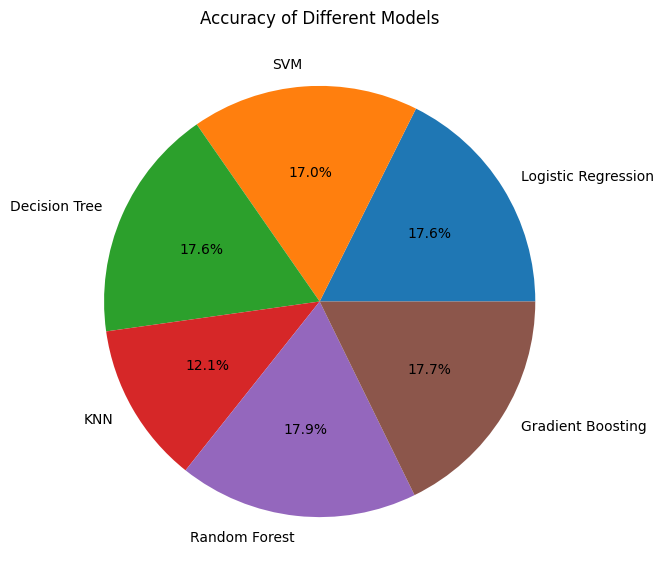

In [132]:
#figure size
plt.figure(figsize=(10, 7))

#pie chart using data from result_df
plt.pie(
    results_df['Accuracy (GridSearch)'],
    labels=results_df['Models'],
    autopct='%1.1f%%' 
)

# Add a title
plt.title('Accuracy of Different Models')

# Display
plt.show()

Conclusions:
The Random Forest model performs best in-terms of accuracy after hyperparameter tuning uisng GridSearchCV with k-Folds validation of 5

<b> Random Forest Model </b>

In [23]:
# Initialize the RandomForestClassifier with the best parameters
best_params_rf = {
    'bootstrap': False,
    'max_depth': 15,
    'max_features': 10,
    'min_samples_leaf': 4,
    'min_samples_split': 5,
    'n_estimators': 20
}


In [24]:
#creating an instance of the model with the parameters
rf_classifier = RandomForestClassifier(**best_params_rf)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=15, max_features=10,
                       min_samples_leaf=4, min_samples_split=5,
                       n_estimators=20)

In [25]:
y_pred_rf = rf_classifier.predict(X_test)

In [26]:
# Get the predicted probabilities for the positive class (fraudulent transactions)
y_pred_proba = rf_classifier.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

# Compute AUPRC
auprc = auc(recall, precision)

print("Area Under the Precision-Recall Curve (AUPRC):", auprc)


Area Under the Precision-Recall Curve (AUPRC): 0.973460987454876


In [28]:
from sklearn.metrics import classification_report

cls = classification_report(y_test, y_pred_rf)
print(cls)

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       110
           1       0.97      0.85      0.91        87

    accuracy                           0.92       197
   macro avg       0.93      0.92      0.92       197
weighted avg       0.93      0.92      0.92       197



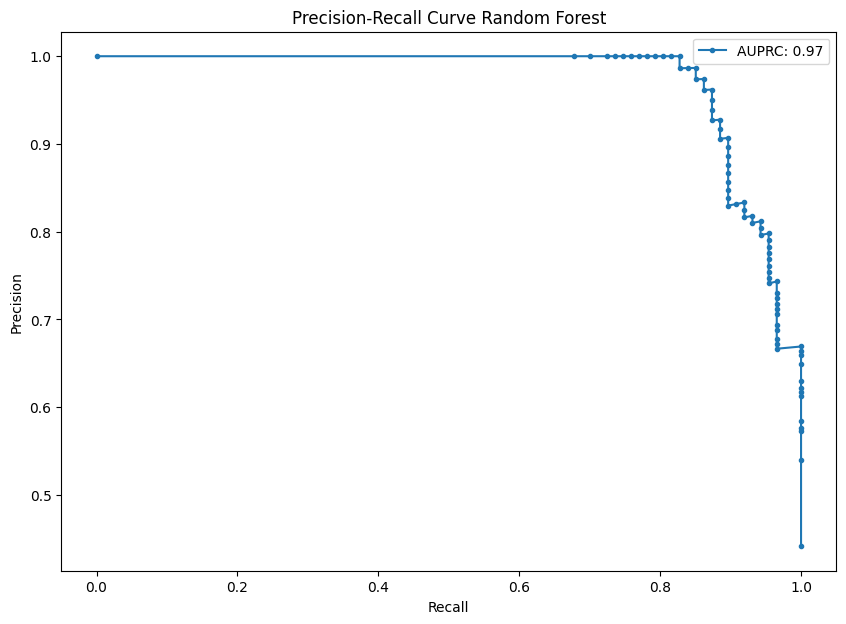

In [46]:
# Set the figure size
plt.figure(figsize=(10, 7))

# Plot the precision-recall curve
plt.plot(recall, precision, marker='.', label=f'AUPRC: {round(auprc, 2)}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.title('Precision-Recall Curve Random Forest')
plt.show()

Conclusion:
1. The Area Under Precision Recall Curve we got 0.97 that is very very good

### <b> Saving the Model </b>

In [47]:
import joblib

# Save the trained model to a file
joblib.dump(rf_classifier, 'random_forest_model.joblib')

['random_forest_model.joblib']